<a href="https://colab.research.google.com/github/philhuang74/Pic16BProject/blob/main/HousingTimeSeriesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh25EKnTPnXY8PihJQY2Bv3nwfzldLKICXjlsf6M16gd2buREOH__26po0pUZgrs3HpWGToC7zZVx/pub?gid=203321834&single=true&output=csv")

In [ ]:
df

,Unnamed: 0,X2010.01.31,X2010.02.28,X2010.03.31,X2010.04.30,X2010.05.31,X2010.06.30,X2010.07.31,X2010.08.31,X2010.09.30,X2010.10.31,X2010.11.30,X2010.12.31,X2011.01.31,X2011.02.28,X2011.03.31,X2011.04.30,X2011.05.31,X2011.06.30,X2011.07.31,X2011.08.31,X2011.09.30,X2011.10.31,X2011.11.30,X2011.12.31,X2012.01.31,X2012.02.29,X2012.03.31,X2012.04.30,X2012.05.31,X2012.06.30,X2012.07.31,X2012.08.31,X2012.09.30,X2012.10.31,X2012.11.30,X2012.12.31,X2013.01.31,X2013.02.28,X2013.03.31,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
0,0,1360248.0,1371500.0,1367034.0,1361617.0,1355836.0,1359737.0,1350814.0,1352028.0,1355050.0,1357467.0,1345246.0,1324915.0,1307680.0,1295608.0,1291779.0,1291437.0,1285861.0,1276696.0,1278042.0,1279045.0,1273932.0,1266850.0,1266738.0,1276037.0,1281603.0,1293825.0,1306397.0,1316797.0,1331233.0,1348873.0,1374957.0,1402682.0,1435454.0,1459243.0,1474723.0,1485395.0,1511770.0,1523685.0,1543086.0,...,3023.0,3022.0,3022.0,3023.0,3024.0,3029.0,3033.0,3037.0,3043.0,3049.0,3055.0,3063.0,3070.0,3078.0,3084.0,3090.0,3097.0,3098.0,3100.0,3101.0,3101.0,3100.0,3099.0,3089.0,3079.0,3069.0,3042.0,3015.0,2988.0,2945.0,2903.0,2860.0,2813.0,2767.0,2720.0,2671.0,2622.0,2573.0,2524.0,2474.0
1,1,398115.0,396063.0,395565.0,397041.0,400088.0,398494.0,398359.0,396367.0,395630.0,394156.0,390941.0,388885.0,388177.0,388716.0,387068.0,385402.0,380495.0,380051.0,378052.0,377060.0,374632.0,372309.0,372095.0,370055.0,368412.0,366060.0,364778.0,364377.0,366856.0,368445.0,370331.0,371541.0,374625.0,378943.0,382496.0,388348.0,393733.0,402041.0,409628.0,...,1606.0,1613.0,1622.0,1631.0,1640.0,1648.0,1657.0,1666.0,1674.0,1682.0,1690.0,1698.0,1707.0,1715.0,1723.0,1730.0,1738.0,1745.0,1753.0,1760.0,1765.0,1771.0,1776.0,1778.0,1781.0,1784.0,1786.0,1789.0,1791.0,1794.0,1797.0,1800.0,1804.0,1807.0,1811.0,1814.0,1818.0,1821.0,1825.0,1829.0
2,2,316435.0,314690.0,310917.0,307476.0,305356.0,301895.0,298806.0,293130.0,292972.0,291076.0,293551.0,291981.0,292166.0,294865.0,300740.0,306147.0,309806.0,307755.0,303093.0,299153.0,297421.0,298241.0,297367.0,298670.0,298313.0,298999.0,300066.0,302568.0,304230.0,306730.0,312119.0,316303.0,320959.0,326291.0,331333.0,334125.0,336074.0,340226.0,347735.0,...,1997.0,2009.0,2020.0,2031.0,2042.0,2055.0,2068.0,2081.0,2095.0,2110.0,2124.0,2138.0,2153.0,2167.0,2178.0,2189.0,2200.0,2208.0,2215.0,2223.0,2230.0,2238.0,2245.0,2252.0,2258.0,2265.0,2272.0,2279.0,2287.0,2295.0,2303.0,2312.0,2321.0,2330.0,2340.0,2349.0,2358.0,2367.0,2377.0,2386.0
3,3,605970.0,605225.0,605009.0,606406.0,613634.0,612335.0,607943.0,598985.0,588396.0,580386.0,573169.0,574081.0,574558.0,576109.0,576040.0,575825.0,570975.0,569383.0,568656.0,575563.0,583384.0,589551.0,592419.0,593743.0,596735.0,599344.0,600531.0,602929.0,607393.0,615303.0,623640.0,623254.0,623715.0,627235.0,639005.0,651280.0,661853.0,676833.0,692813.0,...,2410.0,2417.0,2424.0,2432.0,2439.0,2443.0,2446.0,2450.0,2452.0,2453.0,2455.0,2459.0,2463.0,2467.0,2473.0,2480.0,2486.0,2491.0,2497.0,2502.0,2506.0,2510.0,2514.0,2514.0,2513.0,2512.0,2509.0,2506.0,2504.0,2500.0,2497.0,2493.0,2489.0,2485.0,2481.0,2477.0,2473.0,2468.0,2464.0,2460.0
4,4,496872.0,498563.0,500502.0,502803.0,507965.0,508603.0,507297.0,503664.0,502299.0,500278.0,499579.0,495981.0,492076.0,487472.0,484254.0,478771.0,471880.0,465683.0,469548.0,476720.0,485138.0,485791.0,481384.0,478417.0,476378.0,477081.0,477891.0,482917.0,490776.0,500567.0,501507.0,503939.0,505018.0,515835.0,528504.0,542818.0,558308.0,569939.0,584262.0,...,2183.0,2191.0,2201.0,2211.0,2221.0,2231.0,2241.0,2252.0,2261.0,2269.0,2278.0,2283.0,2289.0,2294.0,2298.0,2302.0,2307.0,2310.0,2314.0,2318.0,2321.0,2325.0,2328.0,2330.0,2333.0,2335.0,2334.0,2334.0,2333.0,2331.0,2329.0,2327.0,2325.0,2323.0,2321

In [ ]:
filter_col = [col for col in df if col.startswith('X')]
filter_col[0:5]

['X2010.01.31', 'X2010.02.28', 'X2010.03.31', 'X2010.04.30', 'X2010.05.31']

In [ ]:
dfT=df[filter_col]
# dfT=dfT.dropna()

In [ ]:
#df.T

In [ ]:
dfT

,X2010.01.31,X2010.02.28,X2010.03.31,X2010.04.30,X2010.05.31,X2010.06.30,X2010.07.31,X2010.08.31,X2010.09.30,X2010.10.31,X2010.11.30,X2010.12.31,X2011.01.31,X2011.02.28,X2011.03.31,X2011.04.30,X2011.05.31,X2011.06.30,X2011.07.31,X2011.08.31,X2011.09.30,X2011.10.31,X2011.11.30,X2011.12.31,X2012.01.31,X2012.02.29,X2012.03.31,X2012.04.30,X2012.05.31,X2012.06.30,X2012.07.31,X2012.08.31,X2012.09.30,X2012.10.31,X2012.11.30,X2012.12.31,X2013.01.31,X2013.02.28,X2013.03.31,X2013.04.30,...,X2017.12.31,X2018.01.31,X2018.02.28,X2018.03.31,X2018.04.30,X2018.05.31,X2018.06.30,X2018.07.31,X2018.08.31,X2018.09.30,X2018.10.31,X2018.11.30,X2018.12.31,X2019.01.31,X2019.02.28,X2019.03.31,X2019.04.30,X2019.05.31,X2019.06.30,X2019.07.31,X2019.08.31,X2019.09.30,X2019.10.31,X2019.11.30,X2019.12.31,X2020.01.31,X2020.02.29,X2020.03.31,X2020.04.30,X2020.05.31,X2020.06.30,X2020.07.31,X2020.08.31,X2020.09.30,X2020.10.31,X2020.11.30,X2020.12.31,X2021.01.31,X2021.02.28,X2021.03.31
0,1360248.0,1371500.0,1367034.0,1361617.0,1355836.0,1359737.0,1350814.0,1352028.0,1355050.0,1357467.0,1345246.0,1324915.0,1307680.0,1295608.0,1291779.0,1291437.0,1285861.0,1276696.0,1278042.0,1279045.0,1273932.0,1266850.0,1266738.0,1276037.0,1281603.0,1293825.0,1306397.0,1316797.0,1331233.0,1348873.0,1374957.0,1402682.0,1435454.0,1459243.0,1474723.0,1485395.0,1511770.0,1523685.0,1543086.0,1565299.0,...,2369312.0,2376811.0,2401287.0,2431335.0,2462833.0,2480481.0,2506144.0,2541309.0,2571857.0,2602667.0,2631670.0,2664748.0,2674137,2692300,2699330,2703370,2690045,2699962,2721500,2748892,2758610,2769712,2785559,2808519,2838348,2854351,2867927,2865503,2868234,2854440,2836336,2807463,2792238,2776001,2756297,2730469,2707075,2688144,2669748,2659924
1,398115.0,396063.0,395565.0,397041.0,400088.0,398494.0,398359.0,396367.0,395630.0,394156.0,390941.0,388885.0,388177.0,388716.0,387068.0,385402.0,380495.0,380051.0,378052.0,377060.0,374632.0,372309.0,372095.0,370055.0,368412.0,366060.0,364778.0,364377.0,366856.0,368445.0,370331.0,371541.0,374625.0,378943.0,382496.0,388348.0,393733.0,402041.0,409628.0,417889.0,...,616845.0,621968.0,627161.0,633752.0,638865.0,643363.0,647153.0,651197.0,653329.0,655191.0,657520.0,660162.0,661044,660846,658204,656046,656422,661212,666883,668430,668486,668680,670128,671766,676500,682212,688985,694710,700293,702885,705097,710528,718546,727126,735089,742620,748652,754558,761302,768925
2,316435.0,314690.0,310917.0,307476.0,305356.0,301895.0,298806.0,293130.0,292972.0,291076.0,293551.0,291981.0,292166.0,294865.0,300740.0,306147.0,309806.0,307755.0,303093.0,299153.0,297421.0,298241.0,297367.0,298670.0,298313.0,298999.0,300066.0,302568.0,304230.0,306730.0,312119.0,316303.0,320959.0,326291.0,331333.0,334125.0,336074.0,340226.0,347735.0,356807.0,...,570298.0,578399.0,584509.0,588549.0,588620.0,591326.0,594969.0,599410.0,598156.0,599145.0,599378.0,599400.0,595967,594836,592684,590664,588891,591177,592824,592807,590067,586772,585751,586772,591153,591235,591074,592042,595743,596325,597314,599300,606455,613067,619675,624758,629591,636837,646154,655950
3,605970.0,605225.0,605009.0,606406.0,613634.0,612335.0,607943.0,598985.0,588396.0,580386.0,573169.0,574081.0,574558.0,576109.0,576040.0,575825.0,570975.0,569383.0,568656.0,575563.0,583384.0,589551.0,592419.0,593743.0,596735.0,599344.0,600531.0,602929.0,607393.0,615303.0,623640.0,623254.0,623715.0,627235.0,639005.0,651280.0,661853.0,676833.0,692813.0,709038.0,...,1460770.0,1485449.0,1512343.0,1541798.0,1563019.0,1570466.0,1576292.0,1585687.0,1598905.0,1611489.0,1626917.0,1644499.0,1656350,1664288,1662898,1663614,1671575,1692410,1712602,1725628,1736972,1753658,1772312,1784697,1797704,1805970,1822740,1838906,1856151,1866779,1878293,1893900,1908833,1918952,1925416,1934178,1945332,1960984,1973954,1985115
4,496872.0,498563.0,500502.0,502803.0,507965.0,508603.0,507297.0,503664.0,502299.0,500278.0,499579.0,495981.0,492076.0,487472.0,484254.0,478771.0,471880.0,465683.0,469548.0,476720.0,485138.0,485791.0,481384.0,478417.0,476378.0,477081.0

In [ ]:
newCol=dfT.columns.str.extract(r'(\d+.\d+.\d+)')
newCol

,0
0,2010.01.31
1,2010.02.28
2,2010.03.31
3,2010.04.30
4,2010.05.31
...,...
130,2020.11.30
131,2020.12.31
132,2021.01.31
133,2021.02.28


In [ ]:
# newCol = pd.to_datetime(newCol, infer_datetime_format=True)
# newCol

In [ ]:
dfT.T[0].to_frame()

,0
X2010.01.31,1360248.0
X2010.02.28,1371500.0
X2010.03.31,1367034.0
X2010.04.30,1361617.0
X2010.05.31,1355836.0
...,...
X2020.11.30,2730469.0
X2020.12.31,2707075.0
X2021.01.31,2688144.0
X2021.02.28,2669748.0


In [ ]:
inp = dfT.T[4].to_frame(name="y")
inp["ds"]=inp.index
inp=inp[["ds","y"]]
inp

,ds,y
X2010.01.31,X2010.01.31,496872.0
X2010.02.28,X2010.02.28,498563.0
X2010.03.31,X2010.03.31,500502.0
X2010.04.30,X2010.04.30,502803.0
X2010.05.31,X2010.05.31,507965.0
...,...,...
X2020.11.30,X2020.11.30,1204079.0
X2020.12.31,X2020.12.31,1216006.0
X2021.01.31,X2021.01.31,1222751.0
X2021.02.28,X2021.02.28,1235760.0


In [ ]:
inp["ds"] = inp["ds"].str.extract(r'(\d+.\d+.\d+)')

In [ ]:
pd.to_datetime(inp["ds"], infer_datetime_format=True)

X2010.01.31   2010-01-31
X2010.02.28   2010-02-28
X2010.03.31   2010-03-31
X2010.04.30   2010-04-30
X2010.05.31   2010-05-31
                 ...    
X2020.11.30   2020-11-30
X2020.12.31   2020-12-31
X2021.01.31   2021-01-31
X2021.02.28   2021-02-28
X2021.03.31   2021-03-31
Name: ds, Length: 135, dtype: datetime64[ns]

In [ ]:
inp["ds"]=pd.to_datetime(inp["ds"], infer_datetime_format=True)

In [ ]:
inp

,ds,y
X2010.01.31,2010-01-31,496872.0
X2010.02.28,2010-02-28,498563.0
X2010.03.31,2010-03-31,500502.0
X2010.04.30,2010-04-30,502803.0
X2010.05.31,2010-05-31,507965.0
...,...,...
X2020.11.30,2020-11-30,1204079.0
X2020.12.31,2020-12-31,1216006.0
X2021.01.31,2021-01-31,1222751.0
X2021.02.28,2021-02-28,1235760.0


In [ ]:
from google.colab import files
dfNew = dfT.copy()
dfNew.columns=list(inp["ds"])
dfNew.to_csv('housing-time-series.csv')
files.download('housing-time-series.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
list(inp["ds"])

[Timestamp('2010-01-31 00:00:00'),
 Timestamp('2010-02-28 00:00:00'),
 Timestamp('2010-03-31 00:00:00'),
 Timestamp('2010-04-30 00:00:00'),
 Timestamp('2010-05-31 00:00:00'),
 Timestamp('2010-06-30 00:00:00'),
 Timestamp('2010-07-31 00:00:00'),
 Timestamp('2010-08-31 00:00:00'),
 Timestamp('2010-09-30 00:00:00'),
 Timestamp('2010-10-31 00:00:00'),
 Timestamp('2010-11-30 00:00:00'),
 Timestamp('2010-12-31 00:00:00'),
 Timestamp('2011-01-31 00:00:00'),
 Timestamp('2011-02-28 00:00:00'),
 Timestamp('2011-03-31 00:00:00'),
 Timestamp('2011-04-30 00:00:00'),
 Timestamp('2011-05-31 00:00:00'),
 Timestamp('2011-06-30 00:00:00'),
 Timestamp('2011-07-31 00:00:00'),
 Timestamp('2011-08-31 00:00:00'),
 Timestamp('2011-09-30 00:00:00'),
 Timestamp('2011-10-31 00:00:00'),
 Timestamp('2011-11-30 00:00:00'),
 Timestamp('2011-12-31 00:00:00'),
 Timestamp('2012-01-31 00:00:00'),
 Timestamp('2012-02-29 00:00:00'),
 Timestamp('2012-03-31 00:00:00'),
 Timestamp('2012-04-30 00:00:00'),
 Timestamp('2012-05-

In [ ]:
m = Prophet(weekly_seasonality=True, growth='linear')#,interval_width=0.00005)
m.add_seasonality(name='daily', period=1, fourier_order=2)
m.fit(inp)

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [ ]:
m = Prophet(weekly_seasonality=True, growth='linear',yearly_seasonality=0.0000001)#,interval_width=0.00005)
m.add_seasonality(name='daily', period=1, fourier_order=2)
m.fit(inp)

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
495,2022-03-27
496,2022-03-28
497,2022-03-29
498,2022-03-30
499,2022-03-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
495,2022-03-27,1.276306e+06,1.254716e+06,1.296815e+06
496,2022-03-28,1.280835e+06,1.258872e+06,1.302376e+06
497,2022-03-29,1.273544e+06,1.250849e+06,1.294341e+06
498,2022-03-30,1.281655e+06,1.258776e+06,1.302882e+06
499,2022-03-31,1.276777e+06,1.254569e+06,1.296650e+06


In [ ]:
# from fbprophet.plot import plot_yearly
# a = plot_yearly(m)

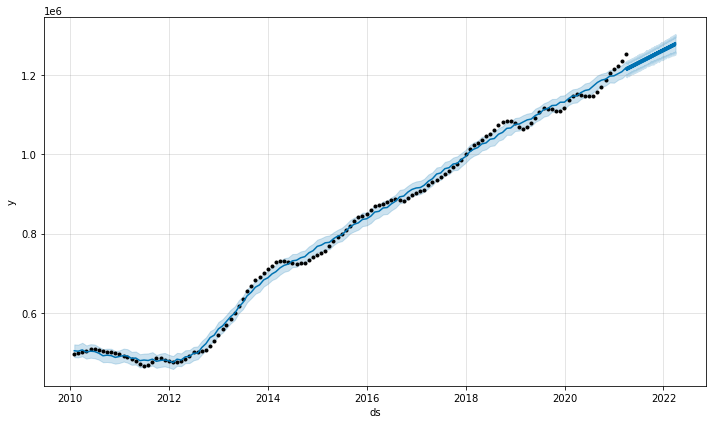

In [ ]:
fig1 = m.plot(forecast)

[[<matplotlib.lines.Line2D at 0x7fb4c364ebd0>],

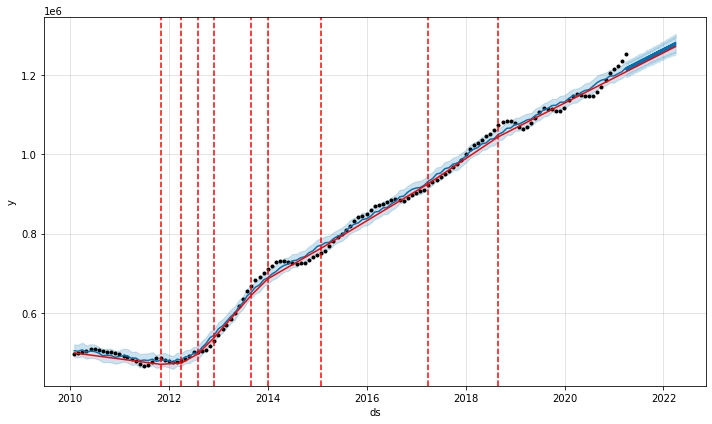

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
a

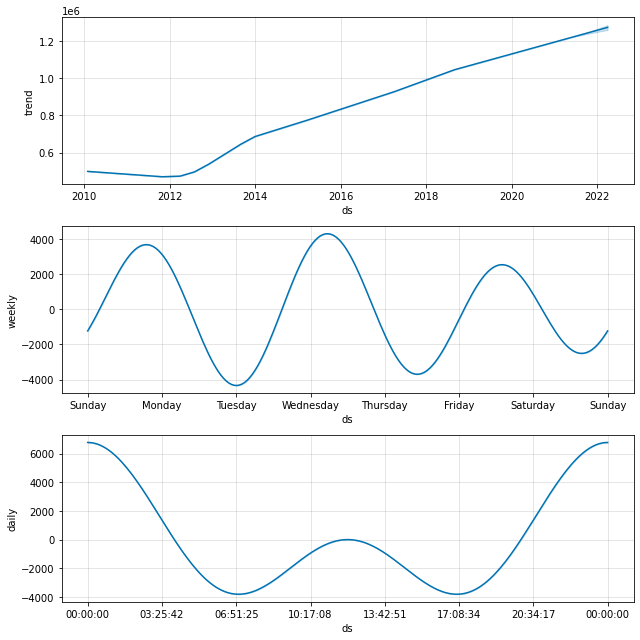

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)

In [ ]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
# def remove_first_n_char(org_str, n):
#     """ Return a string by deleting first n
#     characters from the string """
#     mod_string = ""
#     for i in range(n, len(org_str)):
#         mod_string = mod_string + org_str[i]
#     return mod_string
# remove_first_n_char(inp,1)

In [ ]:
import numpy as np

In [ ]:
# m = Prophet()
# m.fit(df.T)

In [ ]:
data = [['2007-12-10', 9.590761], ['2007-12-11', np.nan], ['2007-12-12', 8.183677]]
dfTest = pd.DataFrame(data, columns = ['ds', 'y'])
dfTest

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,NaN
2,2007-12-12,8.183677


In [ ]:
# Python
m = Prophet()
m.fit(dfTest)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
363,2008-12-07
364,2008-12-08
365,2008-12-09
366,2008-12-10
367,2008-12-11


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
363,2008-12-07,-245.794985,-245.795224,-245.794725
364,2008-12-08,-246.498527,-246.498766,-246.498266
365,2008-12-09,-247.202069,-247.202309,-247.201807
366,2008-12-10,-247.905611,-247.905852,-247.905347
367,2008-12-11,-248.609153,-248.609395,-248.608888


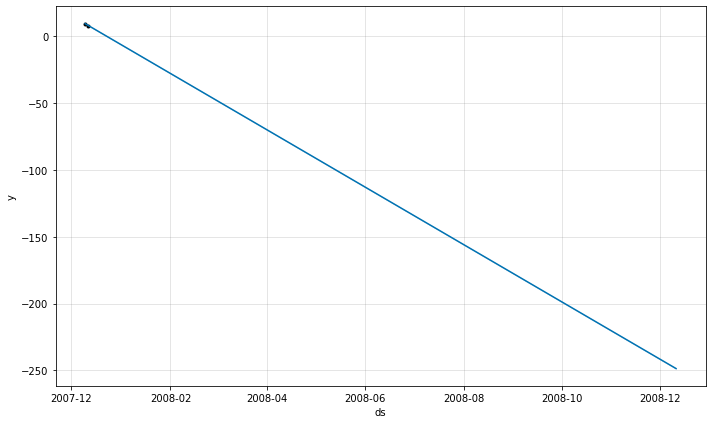

In [ ]:
fig1 = m.plot(forecast)